In [347]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [348]:
review = pd.read_csv("Zomato Restaurant reviews.csv")


# EDA

In [349]:
review.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8486,T Grill,Ranjith Regulla,I went with my office team and was disappoint...,2.5,"32 Reviews , 113 Followers",12/15/2017 14:34,0
163,Paradise,Kaus,Mumbaikars have heard about the famous paradis...,1,"7 Reviews , 2 Followers",5/16/2019 20:26,0
8673,The Chocolate Room,Ravi Kant,Good combo,5,"2 Reviews , 34 Followers",5/13/2018 0:30,0
8064,Tandoori Food Works,Hari,Ordered Chicken tikha & chicken tandoori birya...,1,1 Review,8/25/2018 11:45,0
991,Cream Stone,Govinda Rajulu,super delevery,5,"5 Reviews , 1 Follower",10/10/2018 21:57,0


In [350]:
review.shape

(10000, 7)

In [351]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [352]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [353]:
review.describe(include = 'all') 

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [354]:
len(review[review.duplicated()])

36

There are duplicates in our review data set

In [355]:
review[review.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [356]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [357]:
for col in review.columns:
    print(col,":", review[col].nunique())

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


In [358]:
review["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

1. The rating should be an integer, but it contains the value 'like,' indicating that it is of the object data type.
2. Timings are provided in text format, making them an object data type.
3. We have duplicate values, but since they are null values, we can eliminate them.
4. The dataset consists of a total of 10,000 reviews, encompassing 7 features.
5. With the exception of restaurant names and the number of pictures posted, most values are null.
6. Based on the review dataset's description, we can deduce that 100 restaurants have received customer reviews.
7. The rating can be considered a categorical variable ranging from 0 to 5. We can replace missing values with the median rating for that specific restaurant. Since 'like' is not a rating, we can replace it with a rating of 4, as it represents people liking the taste.
8. Customers have posted pictures with 36 distinct values.

# Data Preparation

In [359]:
review.drop_duplicates(inplace = True, keep = False)

In [360]:
len(review[review.duplicated()])

0

In [361]:
review["Rating"] = review["Rating"].replace('Like', 4)

In [362]:
review["Rating"] = review['Rating'].astype("float")

In [363]:
review["Rating"].dtypes

dtype('float64')

In [364]:
review["Rating"].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [365]:
review.isna().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [366]:
review.dropna(subset =['Review'], inplace = True)

In [367]:
review.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [368]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
1519,KFC,Thirumaleswara Reddy,"I ordered big 8 meal, they cheated ...sent me ...",1.0,"1 Review , 1 Follower",2/3/2019 21:51,0


In [369]:
review["TotalReviews"],review["Followers"] = review["Metadata"].str.split(',').str 

In [370]:
review["TotalReviews"] = pd.to_numeric(review["TotalReviews"].str.split(" ").str[0])
review["Followers"] = pd.to_numeric(review["Followers"].str.split(" ").str[1])
review    

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0


In [371]:
review['Followers'].fillna(0,inplace = True)

In [372]:
review["Time"] = pd.to_datetime(review['Time'])
review['Hour'] = pd.DatetimeIndex(review['Time']).hour
review['Year'] = pd.DatetimeIndex(review['Time']).year


In [373]:
#average rating and total number of review given to the restaurants
avg_rating = review.groupby('Restaurant').agg({'Rating' : 'mean', 'Reviewer' : 'count'}).reset_index().rename(columns = {'Reviewer' : 'Total_Review'})
avg_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


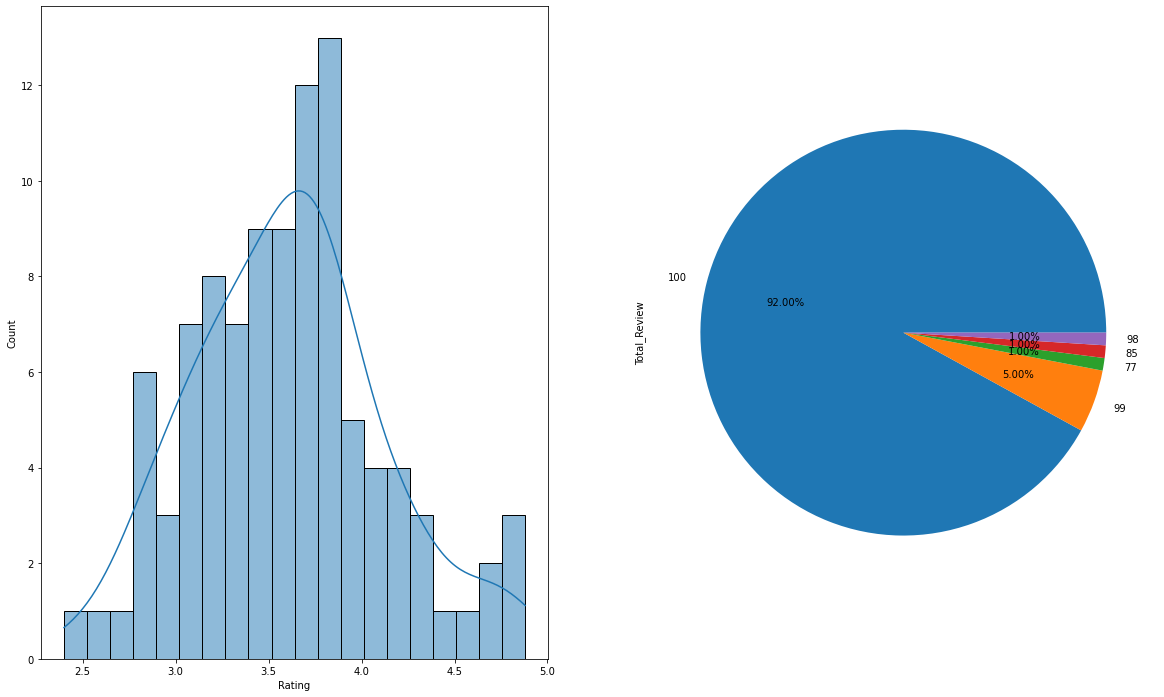

In [374]:
#  histogram of average rating and pie chart of number of reveivers for restaurants
fig,axs = plt.subplots(1,2,figsize=(20,12))
a = sns.histplot(data = avg_rating['Rating'],bins =20, kde =True, ax = axs[0] )
b = avg_rating['Total_Review'].value_counts().plot(kind = 'pie',autopct='%1.2f%%',ax=axs[1] )
plt.show()

In [375]:
#numerical cols

num_col = ['Rating', 'Followers', 'TotalReviews', 'Pictures' ]

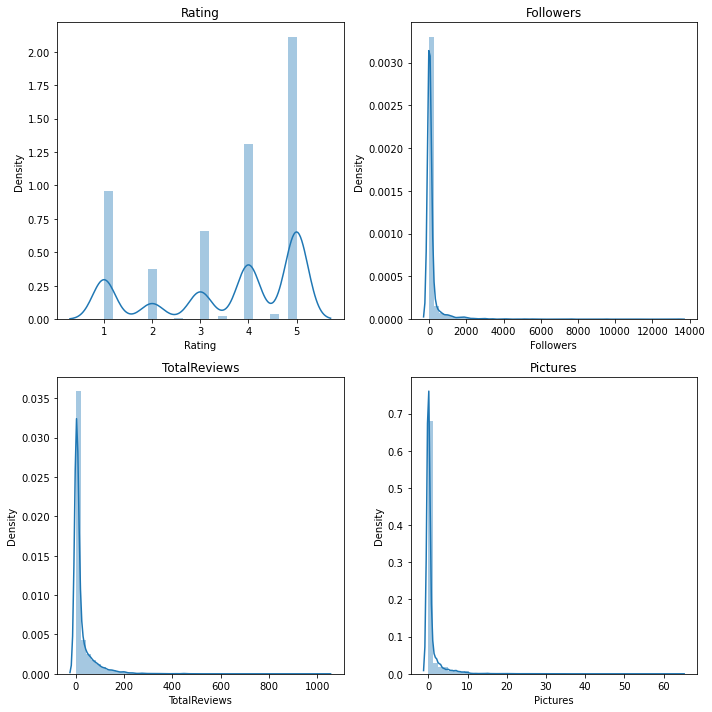

In [376]:
n=1
plt.figure(figsize=(10,10))
for col in num_col:
   plt.subplot(2,2,n)
   n+=1
   sns.distplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()
     

    
  


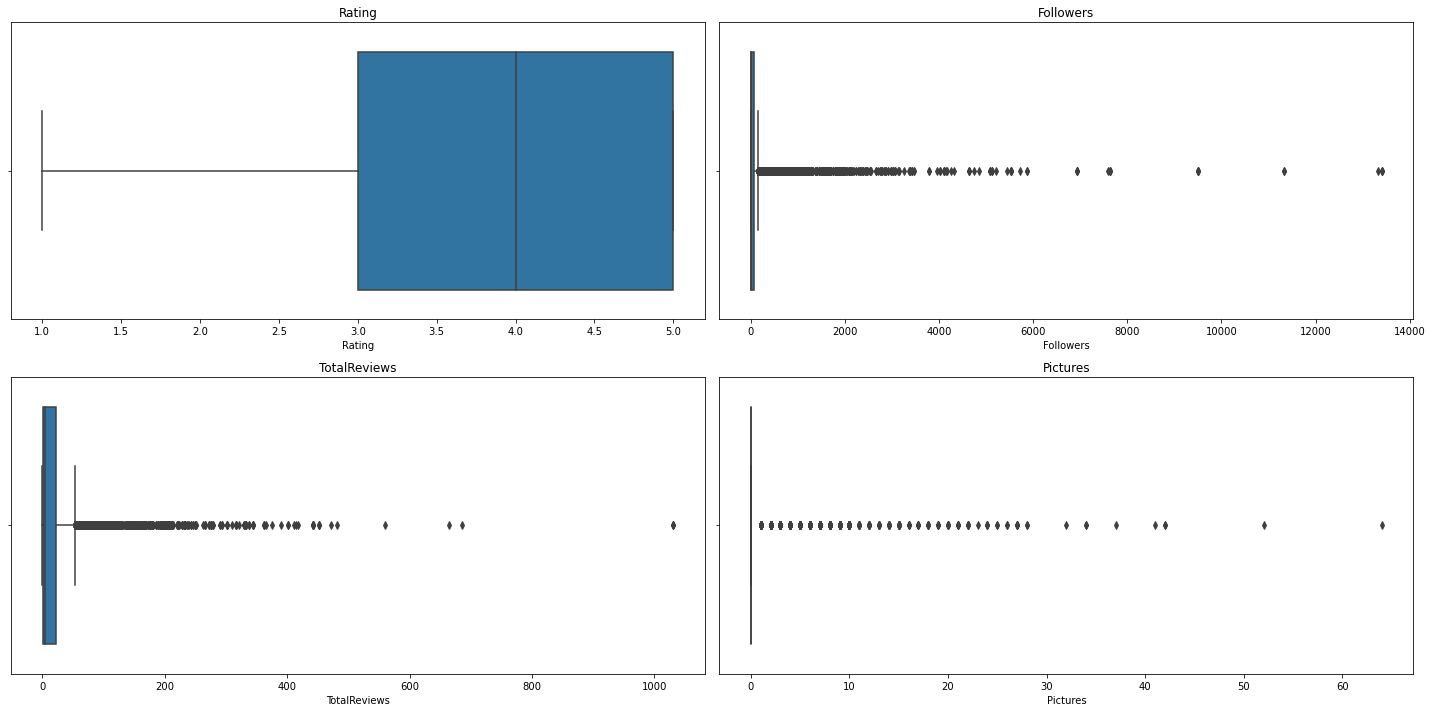

In [377]:
n=1
plt.figure(figsize=(20,10))
for col in num_col:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()
     

In [378]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
2827,Behrouz Biryani,Bhavani Sankar Raju Machiraju,It is just average coming to taste. You dont f...,3.0,"16 Reviews , 11 Followers",2018-12-24 21:19:00,1,16,11.0,21,2018


In [379]:
#The 'Hour' column contains the hour values, and the 'Count' column contains the corresponding count of occurrences for each hour in the review DataFrame.

hr_count=review.groupby(by='Hour',as_index=False)['Hour'].count().reset_index(drop=False)
hr_count.rename(columns={'index':'Hour','Hour':'Count'},inplace=True)
hr_count


,Hour,Count
0,0,509
1,1,313
2,2,167
3,3,102
4,4,55
5,5,39
6,6,44
7,7,78
8,8,134
9,9,171


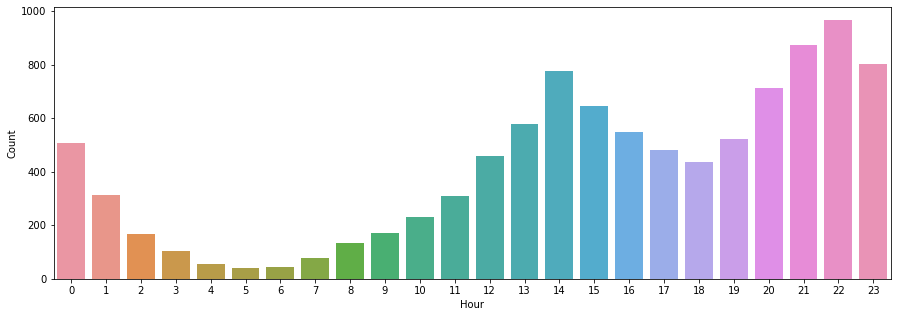

In [380]:
plt.figure(figsize = (15,5))
a = sns.barplot(data = hr_count, x = 'Hour', y = 'Count')
plt.show()

In [381]:
yr_count=review['Year'].value_counts().sort_values(ascending=False).reset_index()
yr_count.rename(columns={'index':'Year','Year':'Count'},inplace=True)
yr_count
     

,Year,Count
0,2018,4896
1,2019,4803
2,2017,213
3,2016,43


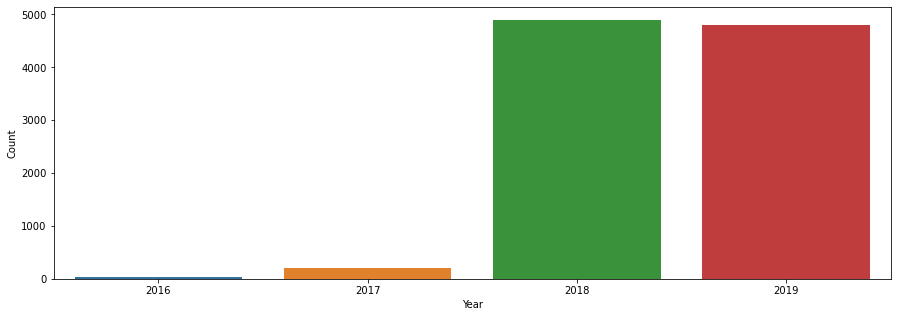

In [382]:
plt.figure(figsize = (15,5))
a = sns.barplot(data = yr_count, x = 'Year', y = 'Count')
plt.show()

In [383]:
#count of review per restaurant

review_rest = review [['Restaurant', 'TotalReviews']].sort_values(by = 'TotalReviews', ascending = False).head(20).reset_index()
review_rest

,index,Restaurant,TotalReviews
0,3124,Pista House,1031
1,7297,Labonel,1031
2,9208,Collage - Hyatt Hyderabad Gachibowli,1031
3,4512,Owm Nom Nom,685
4,7638,The Old Madras Baking Company,665
5,6627,Aromas@11SIX,560
6,9653,Hyderabadi Daawat,482
7,9999,Chinese Pavilion,472
8,9168,Cascade - Radisson Hyderabad Hitec City,452
9,5889,Tempteys,452


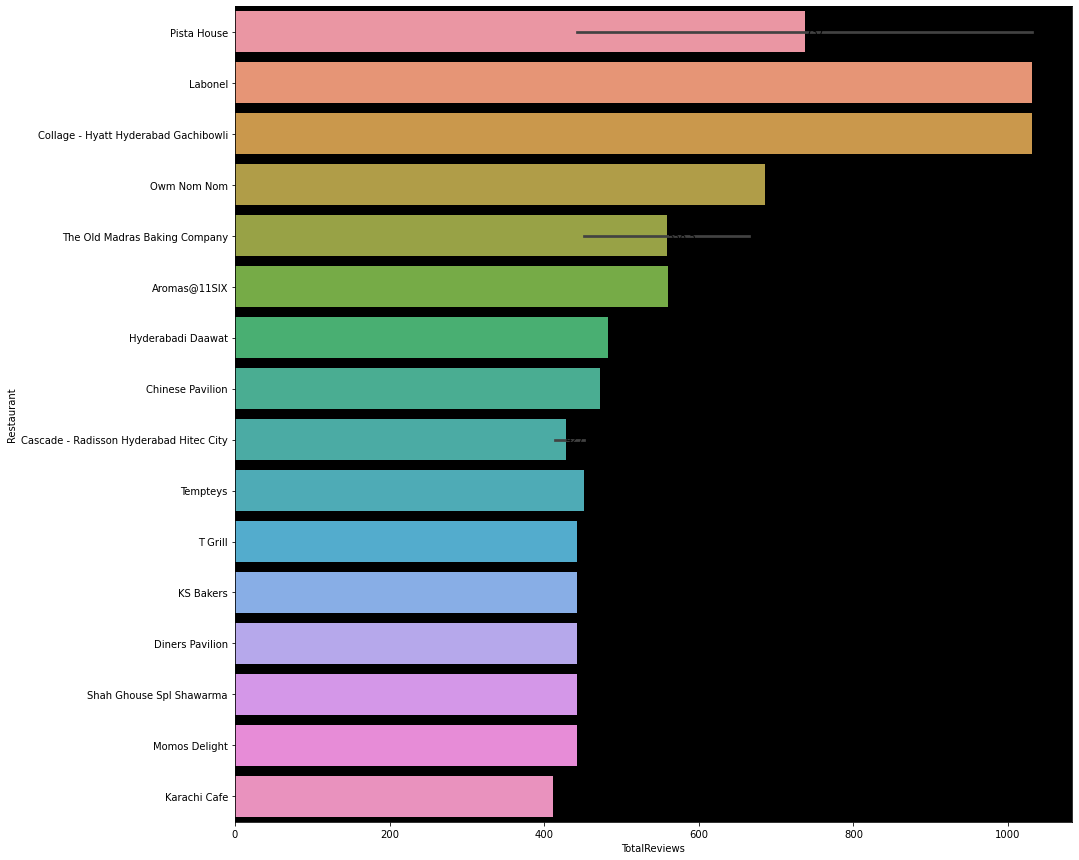

In [384]:
plt.figure(figsize = (15,15))
ab = sns.barplot(x = 'TotalReviews',y = 'Restaurant',data = review_rest )
ab.set_facecolor("black")
ab.bar_label(ab.containers[0])
plt.show()

In [385]:
#The total number of pictures posted for a specific restaurant

pics_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).head(10).reset_index(drop=True))

pics_count

,Restaurant,Pictures
0,PourHouse7,356
1,Arena Eleven,280
2,Marsala Food Company,276
3,Hyderabadi Daawat,234
4,American Wild Wings,218
5,Driven Cafe,212
6,Chinese Pavilion,201
7,Urban Asia - Kitchen & Bar,178
8,Collage - Hyatt Hyderabad Gachibowli,173
9,Jonathan's Kitchen - Holiday Inn Express & Suites,163


In [386]:
#The five restaurants with the lowest number of pictures posted

lowest_pic =  pic_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).reset_index())
bottom_10 = lowest_pic.tail(10)
bottom_10

,index,Restaurant,Pictures
90,9,Aromas@11SIX,5
91,41,Hotel Zara Hi-Fi,5
92,24,Delhi-39,4
93,59,Mohammedia Shawarma,4
94,29,Domino's Pizza,4
95,15,Being Hungry,3
96,43,Hyderabad Chefs,2
97,67,Paradise,2
98,78,Shree Santosh Dhaba Family Restaurant,2
99,40,Hitech Bawarchi Food Zone,1


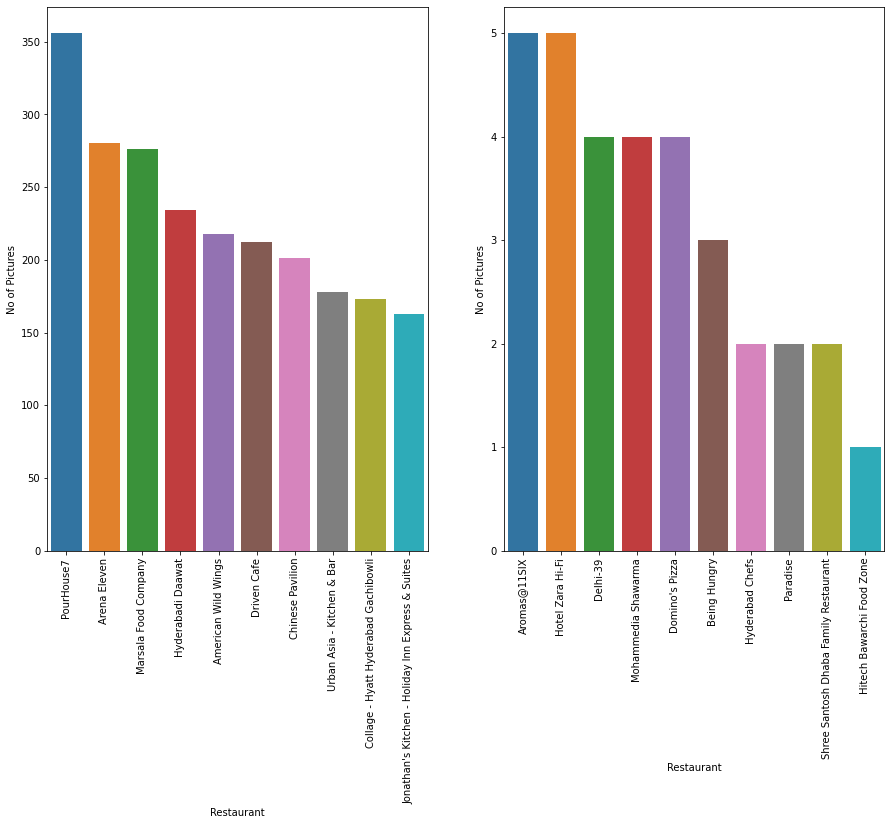

In [387]:
fig, axs = plt.subplots(1,2,figsize =(15,10))
a = sns.barplot(data =pics_count, x = 'Restaurant', y = 'Pictures', ax = axs[0] )
a.set_xticklabels(labels = pics_count["Restaurant"],rotation = 90)
a.set_ylabel("No of Pictures")
b = sns.barplot(data =bottom_10, x = 'Restaurant', y = 'Pictures', ax = axs[1] )
b.set_xticklabels(labels = bottom_10['Restaurant'], rotation = 90)
b.set_ylabel("No of Pictures")
plt.show()



In [388]:
#TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT

follower_count = pd.DataFrame(review[['Restaurant', 'Followers']].groupby(by = 'Restaurant', as_index = False)['Followers'].sum().sort_values(by = 'Followers', ascending = False).reset_index(drop = True))
follower_count

,Restaurant,Followers
0,Pista House,51068.0
1,Komatose - Holiday Inn Express & Suites,46229.0
2,Hyderabadi Daawat,45375.0
3,The Tilt Bar Republic,42126.0
4,Dunkin' Donuts,37667.0
...,...,...
95,Delhi-39,1222.0
96,AB's - Absolute Barbecues,1060.0
97,Paradise,798.0
98,Mohammedia Shawarma,791.0


In [389]:
# top 10 followers

top10Follower = follower_count.head(10)
top10Follower



,Restaurant,Followers
0,Pista House,51068.0
1,Komatose - Holiday Inn Express & Suites,46229.0
2,Hyderabadi Daawat,45375.0
3,The Tilt Bar Republic,42126.0
4,Dunkin' Donuts,37667.0
5,Chinese Pavilion,35426.0
6,Faasos,34640.0
7,T Grill,32222.0
8,Cascade - Radisson Hyderabad Hitec City,31644.0
9,Barbeque Nation,30866.0


In [390]:
#bottom 10 followers

bottom10Follower = follower_count.tail(10)
bottom10Follower

,Restaurant,Followers
90,Flechazo,2748.0
91,Kritunga Restaurant,2223.0
92,Hotel Zara Hi-Fi,1818.0
93,"3B's - Buddies, Bar & Barbecue",1676.0
94,Royal Spicy Restaurant,1497.0
95,Delhi-39,1222.0
96,AB's - Absolute Barbecues,1060.0
97,Paradise,798.0
98,Mohammedia Shawarma,791.0
99,Shree Santosh Dhaba Family Restaurant,562.0


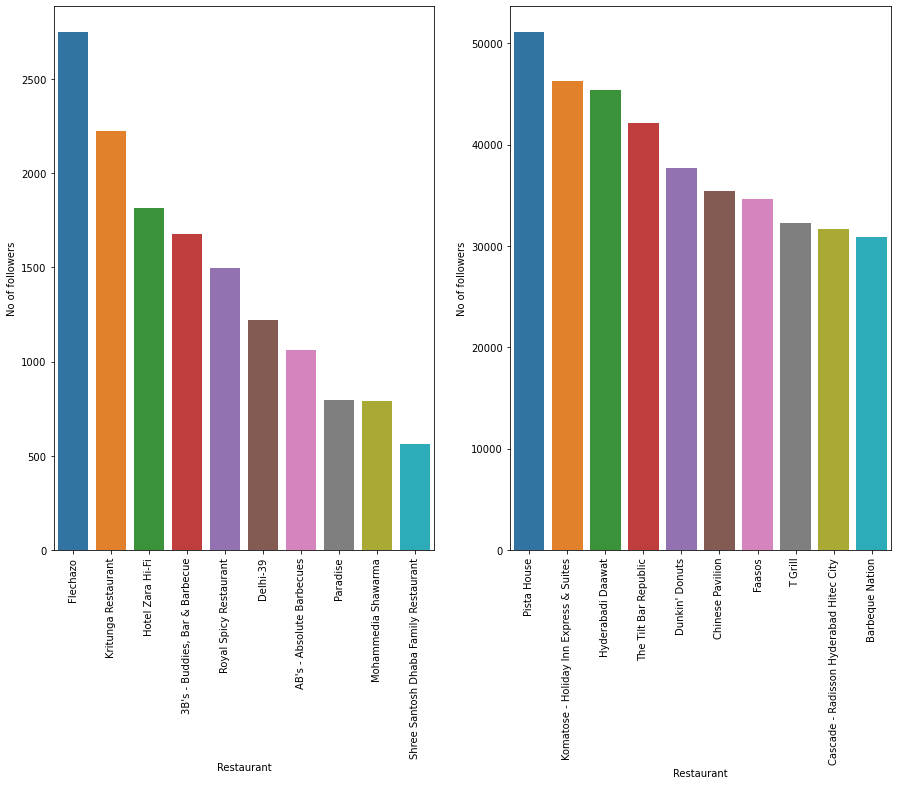

In [391]:
#visualization of least and most follower of reviewer of the restaurants.
fig, axs = plt.subplots(1,2,figsize = (15,10))
a = sns.barplot(data = bottom10Follower, x = 'Restaurant', y = 'Followers', ax = axs[0])
a.set_xticklabels(labels = bottom10Follower['Restaurant'], rotation = 90)
a.set_ylabel("No of followers")
b= sns.barplot(data = top10Follower, x = 'Restaurant', y = 'Followers', ax = axs[1])
b.set_xticklabels(labels = top10Follower['Restaurant'], rotation = 90)
b.set_ylabel("No of followers")
plt.show()



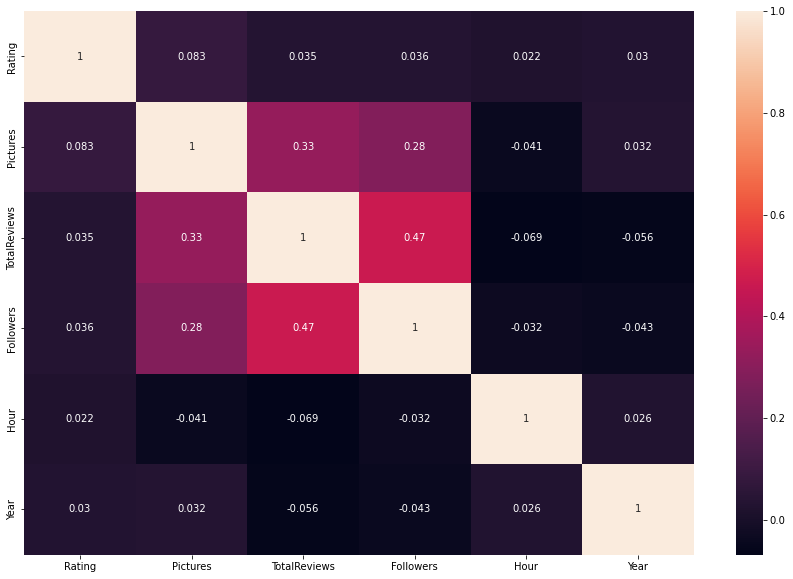

In [392]:
#to see correlation between numerical values

plt.figure(figsize = (15,10))
sns.heatmap(data = review.corr(), annot = True)
plt.show()

The correlation between the number of reviews and followers is 0.47, indicating a moderate relationship.

Likewise, there is a moderate correlation of 0.4 between cost and the number of cuisines.

Conversely, there is a low correlation between:

Pictures and followers
Pictures and the number of reviews
Cost and year
As these correlations are low, there is no occurrence of multicollinearity.

Furthermore, the remaining features exhibit very low correlations.

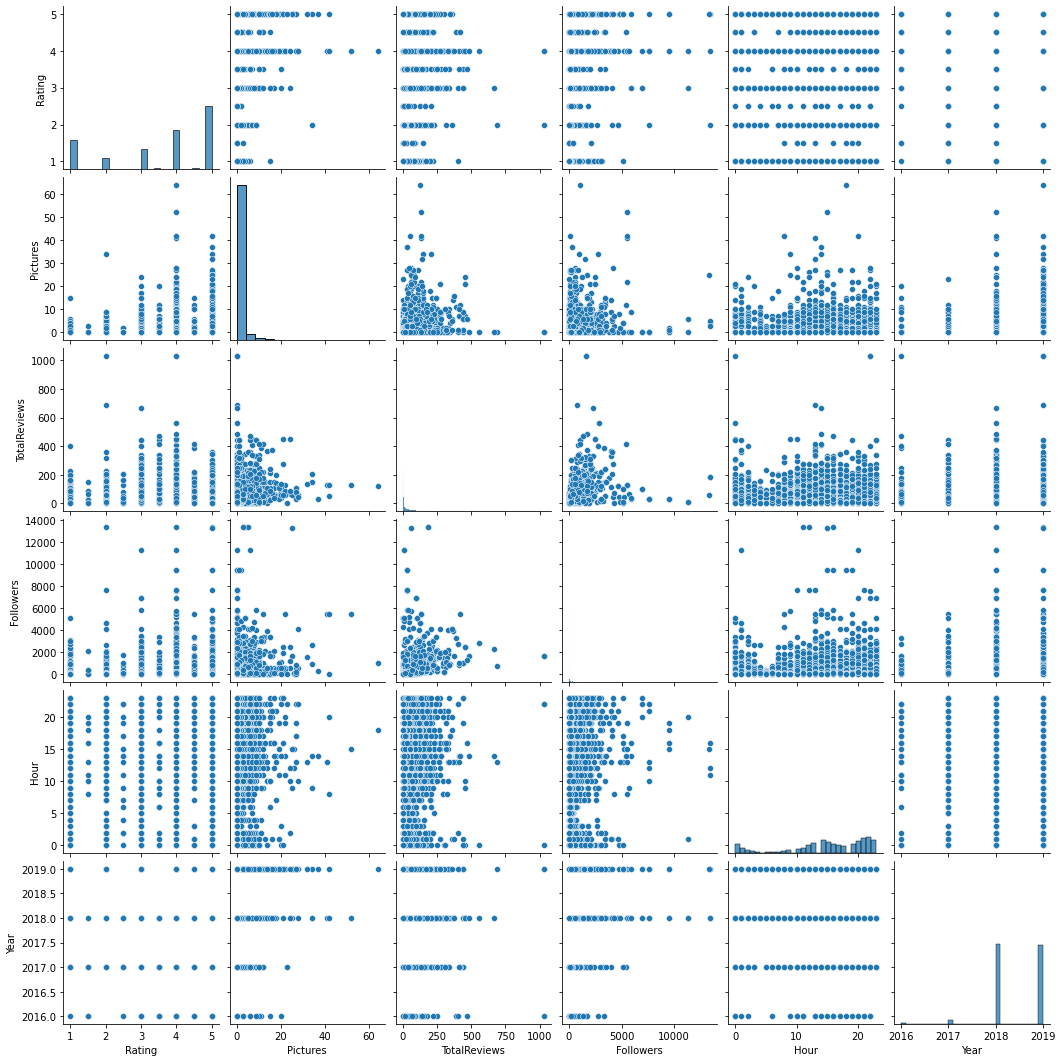

In [393]:
sns.pairplot(review)

# Hypothesis Testing

 

Hypothesis 1 : Average rating by the customer is 3.5

Hypothesis 2 : Restaurants which serves greater variety of cuisines are costly.

Hypothesis 3 : Cost is distributed normally.



In [394]:
from scipy import stats
from scipy.stats import ttest_1samp

In [395]:
pop_mean = 3.5
sample = avg_rating['Rating']
t_test, p_value = ttest_1samp(sample, pop_mean)
print(t_test)
print(p_value)

2.006073337322491
0.04757654819636213


In [396]:
# setting level of significance
los = 0.05

In [397]:
if p_value<= los:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


In [398]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
4749,Shanghai Chef 2,Vasanthan Lr,"Two stars explained, one for bearable ambience...",2.0,"96 Reviews , 768 Followers",2018-09-01 01:30:00,2,96,768.0,1,2018


In [399]:
review_df = review.copy()

In [400]:
def null_value(df):
    null_df = pd.DataFrame()
    null_count = df.isnull().sum()
    null_per = null_count/df.shape[0]%100
    null_df['null_count'] = null_count
    null_df['null_per'] = null_per
    return null_df

In [401]:
review_null = null_value(review_df)
review_null

,null_count,null_per
Restaurant,0,0.0
Reviewer,0,0.0
Review,0,0.0
Rating,0,0.0
Metadata,0,0.0
Time,0,0.0
Pictures,0,0.0
TotalReviews,0,0.0
Followers,0,0.0
Hour,0,0.0


In [402]:
def replace_outliers(df, columns):
    for col in columns:
        data = df[col]
        
        # Calculate the interquartile range (IQR)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        
        # Calculate the lower and upper limits
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.
        5 * iqr
        
        me = np.mean(data) 
        
        # Replace outliers with their upper and lower limits
        df[col] = np.where(df[col] <= lower_limit, me, df[col])
        df[col] = np.where(df[col] >= upper_limit, me, df[col])
    
    return df

In [403]:
test = review_df.copy()

In [404]:
test.describe()

,Rating,Pictures,TotalReviews,Followers,Hour,Year
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.600301,0.751984,24.006730,163.108086,15.183626,2018.452436
std,1.483504,2.575691,50.629274,620.153289,6.580091,0.562564
min,1.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,3.000000,0.000000,1.000000,1.000000,12.000000,2018.000000
50%,4.000000,0.000000,4.000000,7.000000,16.000000,2018.000000
75%,5.000000,0.000000,22.000000,63.000000,21.000000,2019.000000
max,5.000000,64.000000,1031.000000,13410.000000,23.000000,2019.000000


In [405]:
colms = ['Followers', 'Rating', 'TotalReviews', 'Pictures']

In [406]:
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])   
     

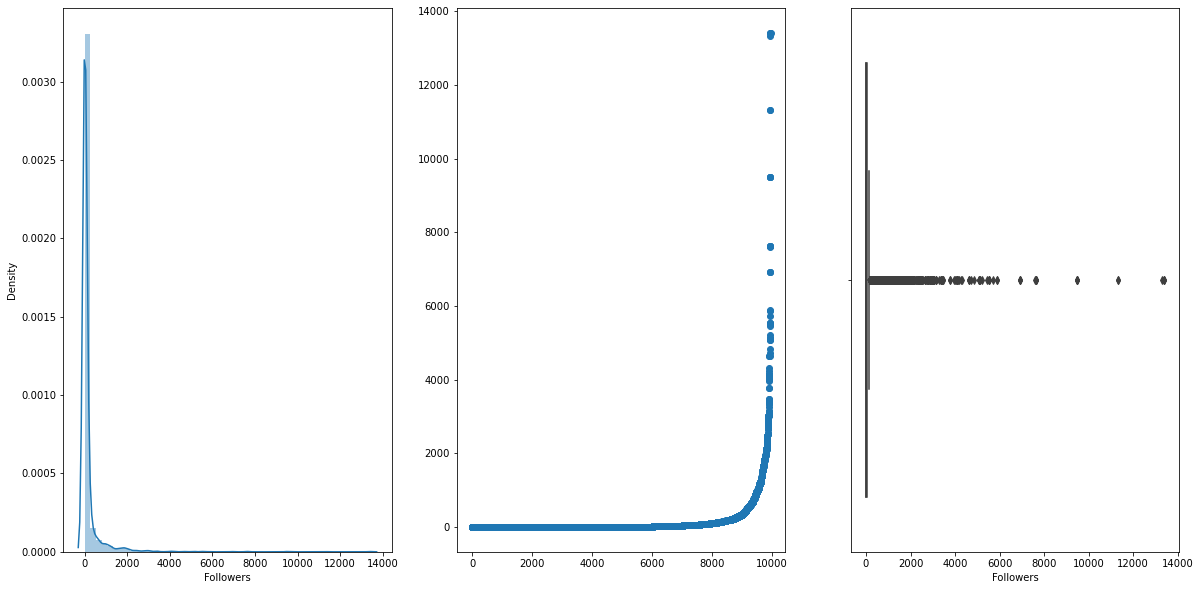

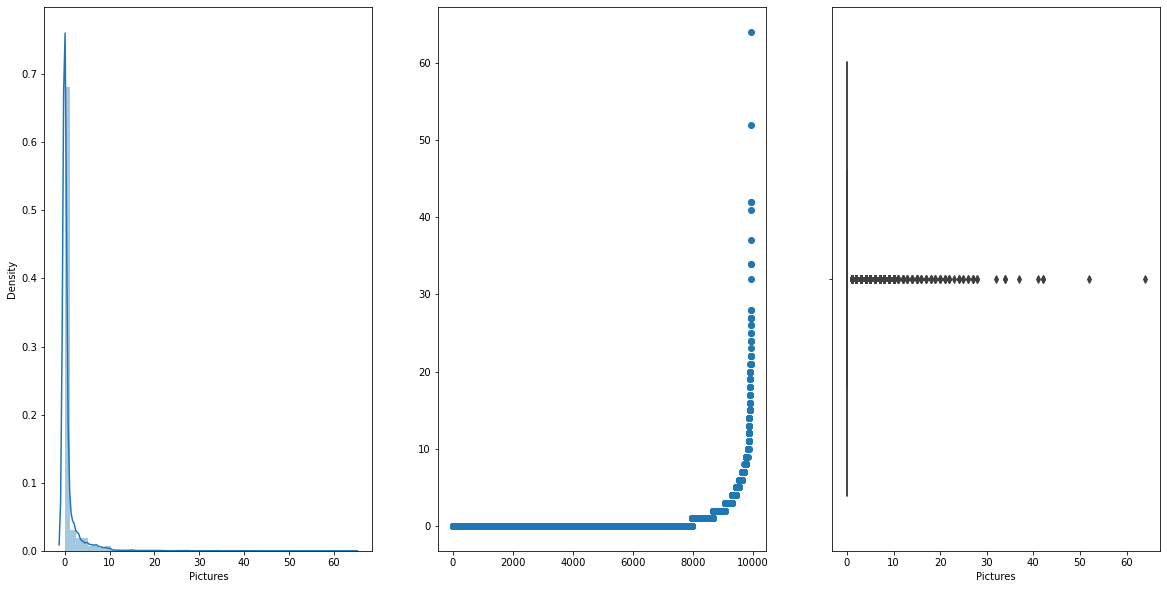

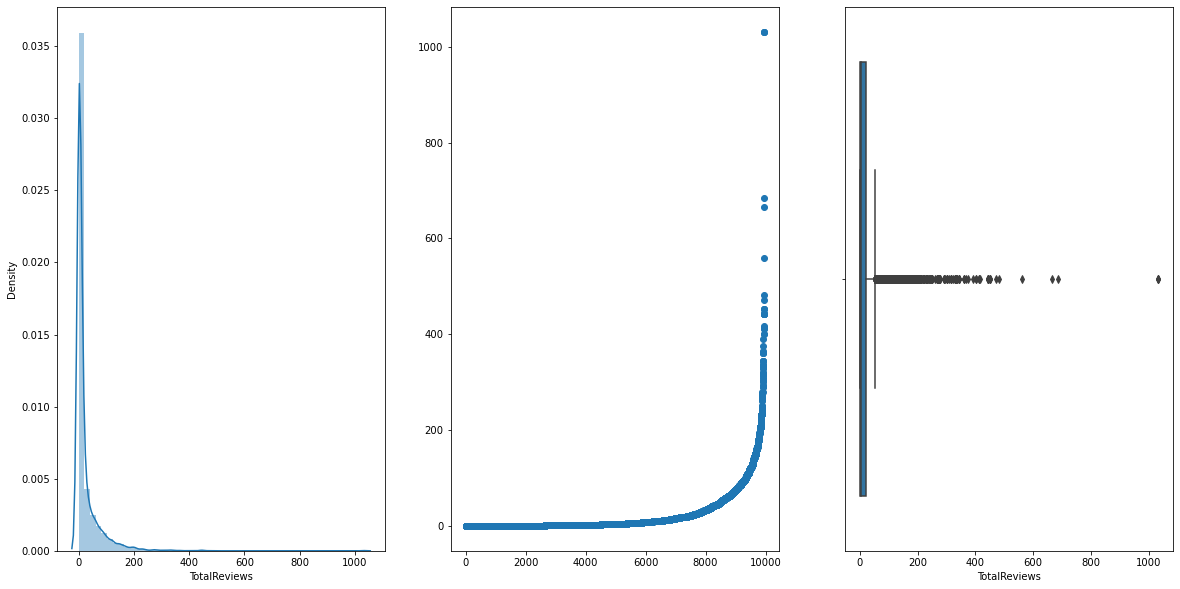

In [407]:
outlier_plots(test,['Followers','Pictures','TotalReviews'])

In [408]:
def check_zero(df):
    zero_column  = []
    for col in df.columns:
        if (df[col] == 0).any():
            zero_column.append(col)
    return zero_column

In [409]:
check_zero(test)

['Pictures', 'TotalReviews', 'Followers', 'Hour']

In [410]:
def log_transform_column(df, column_name):
    df[column_name] = np.log(df[column_name])
    return df

In [411]:

log_transform_column(test,'Pictures')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,-inf,1,2.0,15,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,-inf,3,2.0,14,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,-inf,2,3.0,22,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,-inf,1,1.0,22,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,-inf,3,2.0,21,2019
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,-inf,53,54.0,0,2016
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,-inf,2,53.0,22,2016
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,1.098612,65,423.0,10,2016
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,-inf,13,144.0,17,2016


In [412]:
review_df.describe()

,Rating,Pictures,TotalReviews,Followers,Hour,Year
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.600301,0.751984,24.006730,163.108086,15.183626,2018.452436
std,1.483504,2.575691,50.629274,620.153289,6.580091,0.562564
min,1.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,3.000000,0.000000,1.000000,1.000000,12.000000,2018.000000
50%,4.000000,0.000000,4.000000,7.000000,16.000000,2018.000000
75%,5.000000,0.000000,22.000000,63.000000,21.000000,2019.000000
max,5.000000,64.000000,1031.000000,13410.000000,23.000000,2019.000000


# Textual Data Preprocessing

In [413]:
sentiment_df = review_df[['Review', 'Rating']]

In [414]:

import contractions

In [415]:
review_df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
4872,Udipi's Upahar,Anjali Pandey,awesome,5.0,"1 Review , 1 Follower",2018-07-17 20:45:00,0,1,1.0,20,2018
5162,Hitech Bawarchi Food Zone,Kanakesh,Good,5.0,2 Reviews,2018-08-16 23:22:00,0,2,0.0,23,2018
3929,Deli 9 Bistro,Mohan Kr,"Lovely place, mix and match seating to auit wh...",5.0,"10 Reviews , 4 Followers",2019-02-08 01:33:00,0,10,4.0,1,2019
3969,Deli 9 Bistro,Sneha Bhat,Had a very disappointing experience here today...,2.0,"35 Reviews , 129 Followers",2018-12-01 17:38:00,0,35,129.0,17,2018
93,Beyond Flavours,Farheen Shaik,Waiters are not good enough and you will get i...,1.0,1 Review,2019-05-05 22:10:00,0,1,0.0,22,2019


In [416]:
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(str(x)))

In [417]:
sentiment_df['Review'] = sentiment_df['Review'] .str.lower()

In [418]:
import string
def punc(text):
    translator = text.translate(str.maketrans('','',string.punctuation))
    return(translator)

In [419]:
sentiment_df['Review']= sentiment_df['Review'].apply(punc)

In [420]:
def remove_digits(text):
    char_str = ''.join((z for z in text if not z.isdigit()))
    return char_str

In [421]:
sentiment_df['Review']= sentiment_df['Review'].apply(remove_digits)

In [422]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [423]:
sw = stopwords.words('english')


In [424]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return ' '.join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [425]:
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [426]:
import emoji

In [427]:
def convert_emoj(text):
    converted_text = emoji.demojize(text).replace(":","")
 
    return converted_text

In [432]:
sentiment_df['Review'] = sentiment_df['Review'].apply(convert_emoj)

In [428]:
import nltk



In [441]:

# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [442]:
sentiment_df['Review'].sample(5)

5396    [superb, taste, little, delay, getting, produc...
9799    [nice, place, dinner, date, food, good, ambien...
3259    [food, place, nice, except, ‘, murg, malai, ti...
3884    [place, amazing, ambience, professional, premi...
4741    [hi, restraunt, even, customer, says, dish, bl...
Name: Review, dtype: object

In [443]:
from nltk.stem import WordNetLemmatizer

In [450]:
lemmatizer = WordNetLemmatizer()

In [451]:
def lemmatize(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [448]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roli\AppData\Roaming\nltk_data...


True

In [452]:
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize)

In [453]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = sentiment_df['Review']
X= vectorizer.fit_transform(X)

In [454]:

# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('ambience', 498), ('good', 6292), ('food', 5596), ('quite', 12161), ('saturday', 13237), ('lunch', 8891), ('cost', 3361), ('effective', 4673), ('place', 11430), ('sate', 13216), ('brunch', 2099), ('one', 10496), ('also', 417), ('chill', 2697), ('friend', 5826), ('parent', 10986), ('waiter', 16623), ('soumen', 14214), ('da', 3696), ('really', 12378), ('courteous', 3411), ('helpful', 6893), ('pleasant', 11533), ('evening', 4921), ('service', 13496), ('prompt', 11919), ('experience', 5095), ('kudos', 8352), ('must', 9894), ('try', 15932), ('great', 6497), ('thnx', 15516), ('pradeep', 11705), ('subroto', 14760), ('personal', 11267), ('recommendation', 12433), ('penne', 11199), ('alfredo', 335), ('pasta', 11062), ('music', 9868), ('background', 1191), ('amazing', 454), ('arun', 872), ('guy', 6641), ('behavior', 1493), ('sincerety', 13858), ('course', 3402), ('would', 17007), ('like', 8644), ('visit', 16542), ('goodwe', 6402), ('ordered', 10595), ('kodi', 8294), ('drumstick', 45

# Featur Manipulation

In [455]:

review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'TotalReviews', 'Followers', 'Hour', 'Year'],
      dtype='object')

In [456]:
review_df.drop(columns=['Metadata', 'Time'], axis = 1, inplace=True)

In [457]:
def sentiment(rating):
    if rating >= 3.5:
        return 1
    else : 
        return 0

In [458]:
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(sentiment)
sentiment_df

,Review,Rating,Sentiment
0,"[ambience, good, food, quite, good, saturday, ...",5.0,1
1,"[ambience, good, pleasant, evening, service, p...",5.0,1
2,"[must, try, great, food, great, ambience, thnx...",5.0,1
3,"[soumen, da, arun, great, guy, behavior, since...",5.0,1
4,"[food, goodwe, ordered, kodi, drumstick, baske...",5.0,1
...,...,...,...
9995,"[madhumathi, mahajan, well, start, nice, court...",3.0,0
9996,"[place, never, disappointed, u, food, courteou...",4.5,1
9997,"[bad, rating, mainly, chicken, bone, found, ve...",1.5,0
9998,"[personally, love, prefer, chinese, food, coup...",4.0,1


# Feature Selection

In [459]:
#check if data needs to be transformed
def skewed_feature(df,features):
  symmetric_f = []
  skewed_f = []
  for i in features:
      if (df[i].skew() <= -1) | (df[i].skew() >= 1) :
        skewed_f.append(i)
      else:
        symmetric_f.append(i)
  return symmetric_f, skewed_f

In [460]:
#finding symmetric and skew symmetric features in Sentiment DF
features=['Rating', 'Sentiment']
s,sk=skewed_feature(sentiment_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Rating', 'Sentiment']
Skew symmetric features : []


In [461]:
y = sentiment_df['Sentiment']


In [462]:

y.value_counts()
     

1    6316
0    3639
Name: Sentiment, dtype: int64

In [494]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (7466, 17296)
y_train  (7466,)
X_test  (2489, 17296)
y_test  (2489,)


<AxesSubplot:ylabel='Sentiment'>

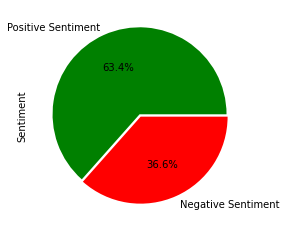

In [495]:
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['green','red'],
                               explode=[0.01,0.02])


In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [532]:
models = [["LogisticRegression", LogisticRegression()], ["DecisionTree", DecisionTreeClassifier()],
          ["RandomForest",RandomForestClassifier()],["XGBoost", XGBClassifier()],
          ["KNN", KNeighborsClassifier()], ['RF', RandomForestClassifier()]]

In [533]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

def calculate_model_metrics(models, X, y, test_size=0.2):
    results = []
    for model_name, model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        train_acc = model.score(X_train, y_train)
        test_acc = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred)
        test_roc_auc = roc_auc_score(y_test, y_pred)
        
        results.append([model_name, train_acc, test_acc, test_precision, test_recall, test_f1, test_roc_auc])
    
    # Convert results to DataFrame
    columns = ["Model", "Train Accuracy", "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test ROC_AUC Score"]
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

In [534]:
results = calculate_model_metrics(models, X, y)

In [535]:
results

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC_AUC Score
0,LogisticRegression,0.914992,0.871924,0.873197,0.928918,0.900196,0.853569
1,DecisionTree,0.992341,0.793069,0.823668,0.848950,0.836118,0.775073
2,RandomForest,0.992341,0.869915,0.852920,0.955574,0.901333,0.842329
3,XGBoost,0.942742,0.857860,0.866462,0.911955,0.888627,0.840440
4,KNN,0.750377,0.584129,0.630241,0.801292,0.705548,0.514192
5,RF,0.992341,0.867906,0.849964,0.956381,0.900038,0.839412


In [536]:

def visualize_results(df_results):
    metrics = ["Train Accuracy", "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test ROC_AUC Score"]
    
    # Set the model names as the index
    df_results.set_index("Model", inplace=True)
    
    # Plot the metrics
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    df_results[metrics].plot(kind="bar", rot=45, ax=plt.gca())
    plt.title("Model Performance Metrics")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


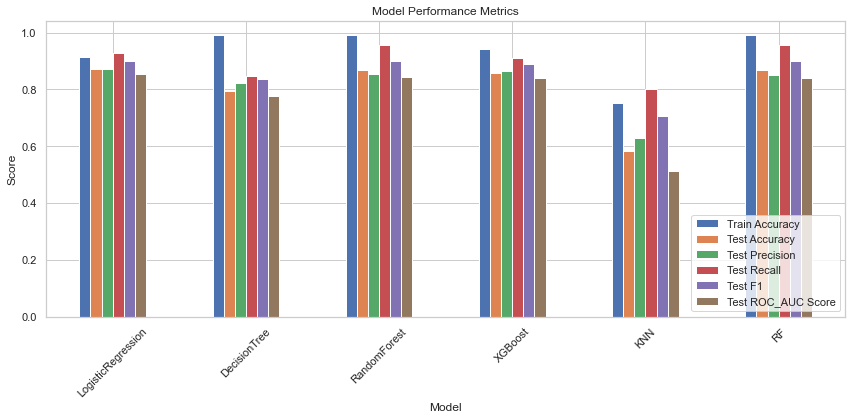

In [537]:
visualize_results(results)

# Hyperparameter tuning

In [538]:
from sklearn.model_selection import GridSearchCV

In [539]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    }
]
     

In [540]:
grid_lr = GridSearchCV( LogisticRegression(fit_intercept = True, class_weight='balanced'), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = grid_lr.fit(X_train,y_train)

# Get the results
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)
     

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.8560134043166138
LogisticRegression(class_weight='balanced')
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [541]:
final_model = LogisticRegression(random_state=42, solver='lbfgs', penalty= 'l2', C = 10 )
final_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [542]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=4))
     

              precision    recall  f1-score   support

           0     0.8074    0.8093    0.8084       860
           1     0.8992    0.8981    0.8986      1629

    accuracy                         0.8674      2489
   macro avg     0.8533    0.8537    0.8535      2489
weighted avg     0.8675    0.8674    0.8675      2489



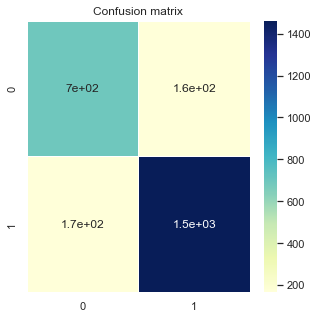

In [543]:

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.show()
     

In [544]:
import pickle
pickle.dump(final_model,open('model_save1','wb'))